<a href="https://colab.research.google.com/github/Charlottebenett/collab/blob/main/Fashion_MNIST_flute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Charger le dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Dimension du dataset
print(f'Nombre d\'images d\'entraînement: {x_train.shape[0]}')
print(f'Nombre d\'images de test: {x_test.shape[0]}')
print(f'Dimension des images: {x_train.shape[1]}x{x_train.shape[2]} pixels')

# Répartition des classes
classes, counts = np.unique(y_train, return_counts=True)
print(f'Répartition des classes: {dict(zip(classes, counts))}')


4422102/4422102 [==============================] - 1s 0us/step
Nombre d'images d'entraînement: 60000
Nombre d'images de test: 10000
Dimension des images: 28x28 pixels
Répartition des classes: {0: 6000, 1: 6000, 2: 6000, 3: 6000, 4: 6000, 5: 6000, 6: 6000, 7: 6000, 8: 6000, 9: 6000}


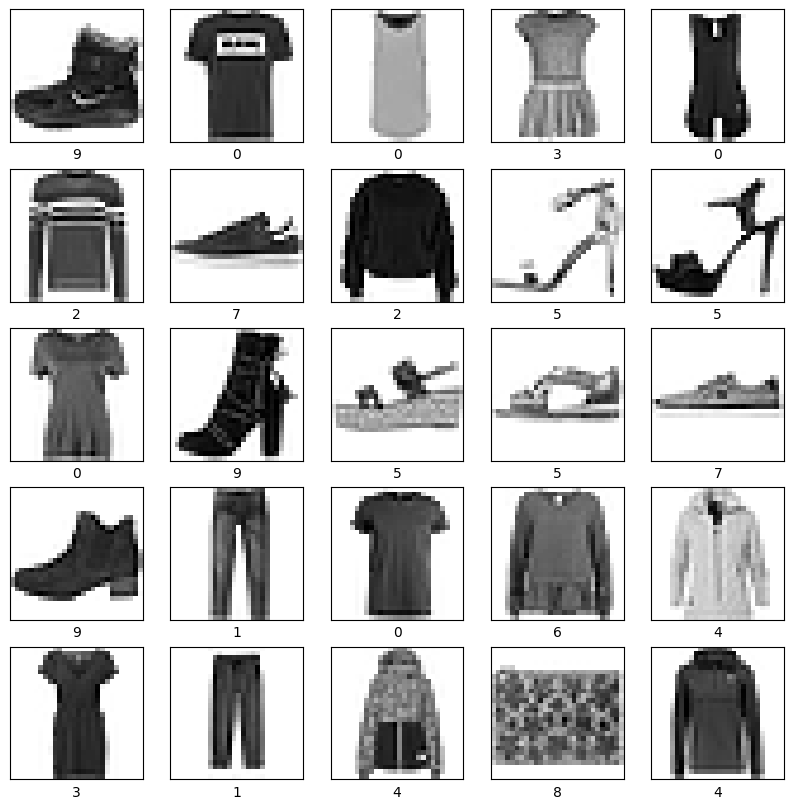

In [3]:
# Visualiser quelques images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()


3. Nettoyage et Prétraitement

In [4]:
# Normalisation des images
x_train = x_train / 255.0
x_test = x_test / 255.0


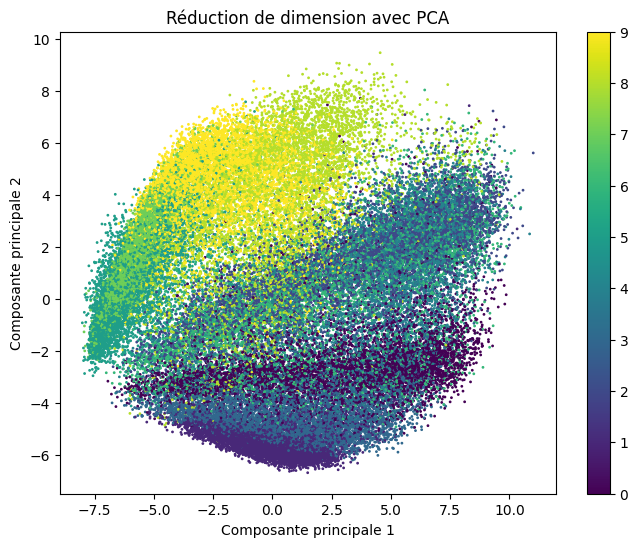

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Redimensionner les données pour PCA
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Appliquer PCA pour réduire à 2 dimensions pour la visualisation
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train_flat)

# Visualiser les résultats
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', s=1)
plt.colorbar()
plt.title('Réduction de dimension avec PCA')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.show()


In [5]:
# Statistiques des images
print(f'Moyenne des pixels: {np.mean(x_train)}')
print(f'Écart-type des pixels: {np.std(x_train)}')


Moyenne des pixels: 0.2860405969887955
Écart-type des pixels: 0.35302424451492237


In [6]:
# Construction d'un modèle simple de réseau de neurones convolutif (CNN)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

our le dataset Fashion MNIST, plusieurs modèles Keras peuvent être efficaces. Le choix du meilleur modèle dépend de plusieurs facteurs, tels que la précision souhaitée, le temps d'entraînement et la complexité du modèle. Voici quelques modèles couramment utilisés pour Fashion MNIST:

1. Réseaux de Neurones Convolutionnels (CNN):
Les CNN sont souvent le choix privilégié pour les tâches de classification d'images en raison de leur capacité à détecter les caractéristiques spatiales dans les images.
Un modèle CNN de base avec quelques couches convolutionnelles, des couches de pooling et des couches fully-connected (Dense) peut offrir de bons résultats.

2. Réseaux Neuronaux Denses (DNN):
Bien que moins sophistiqués que les CNN pour les tâches de vision par ordinateur, les DNN peuvent toujours être efficaces, en particulier pour une première approche rapide. Un modèle avec plusieurs couches cachées peut être un bon point de départ.

- Transfer Learning avec des Modèles Pré-entrainés: Utiliser des modèles pré-entrainés comme VGG16, ResNet, ou MobileNet peut être une approche efficace, surtout si l'on adapte ces modèles à la spécificité des données de Fashion MNIST.

3. Autoencoders et Réseaux Génératifs Adverses (GANs):
Pour des tâches plus avancées, comme la génération d'images ou l'apprentissage non supervisé, ces modèles peuvent être explorés.

En général, un CNN simple est souvent un bon point de départ pour le dataset Fashion MNIST. Il offre un bon équilibre entre précision et complexité, ce qui le rend idéal pour la classification d'images de vêtements et d'accessoires. Il est aussi adaptable, permettant d'ajuster la profondeur et la complexité du réseau en fonction des besoins spécifiques et des ressources disponibles.

GPT

D'accord, pour commencer avec un modèle simple et efficace pour l'analyse du dataset Fashion MNIST, nous pouvons construire un réseau de neurones convolutionnels (CNN) de base. Ce modèle servira de point de départ, et en fonction de ses performances, nous pourrons l'ajuster ou opter pour un modèle plus complexe et performant. Voici les étapes pour construire et entraîner ce modèle CNN de base avec Keras:
Étape 1: Préparation des données

    Chargement du Dataset: Fashion MNIST est directement disponible dans Keras et peut être chargé facilement.
    Normalisation: Les images doivent être normalisées pour que leurs valeurs de pixels soient comprises entre 0 et 1. Cela se fait en divisant les valeurs des pixels par 255.
    Redimensionnement: Assurez-vous que les images ont la bonne forme attendue par le réseau (par exemple, 28x28x1 pour un CNN en niveaux de gris).
    Séparation en Ensembles de Formation et de Test: Diviser le dataset en deux parties : une pour l'entraînement et une pour le test.

Étape 2: Construction du Modèle CNN

    Définir l'Architecture du Modèle: Commencez avec une couche convolutionnelle suivie d'une couche de pooling, et répétez ce motif une ou deux fois. Ensuite, aplatissez la sortie et ajoutez une ou plusieurs couches Dense pour la classification.
    Fonction d'Activation: Utilisez 'relu' pour les couches cachées et 'softmax' pour la couche de sortie.
    Compilation du Modèle: Compilez le modèle en choisissant un optimiseur (comme 'adam'), une fonction de perte ('categorical_crossentropy' pour la classification multi-classes) et des métriques (comme 'accuracy').

Étape 3: Entraînement du Modèle

    Entraîner le Modèle: Utilisez la méthode .fit pour entraîner le modèle sur l'ensemble de formation. Choisissez un nombre approprié d'époques et de taille de batch.
    Validation: Utilisez l'ensemble de test pour valider le modèle après l'entraînement.

Étape 4: Évaluation et Ajustement

    Évaluer les Performances: Après l'entraînement, évaluez la performance du modèle sur l'ensemble de test.
    Ajustement: Selon les résultats, vous pouvez ajuster le modèle en modifiant l'architecture, les hyperparamètres ou en utilisant des techniques comme le dropout pour réduire le surajustement.

Ce modèle de base servira de référence pour évaluer les performances et décider des ajustements nécessaires ou de la transition vers un modèle plus avancé.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Étape 1: Préparation des données
# Charger le dataset Fashion MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalisation des données
x_train = x_train / 255.0
x_test = x_test / 255.0

# Redimensionnement des images pour le CNN
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convertir les étiquettes en catégories
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Étape 2: Construction du Modèle CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model.summary()

# Étape 3: Entraînement du Modèle
# Entraînement du modèle sur l'ensemble de formation
training_results = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Retourner le modèle et les résultats de l'entraînement pour une évaluation ultérieure
model, training_results


4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                           

(<keras.src.engine.sequential.Sequential at 0x7c5119cf0c40>,
 <keras.src.callbacks.History at 0x7c5116f43a60>)

In [3]:
# Augmentation des couches convolutionnelles et ajustement des filtres
model_adjusted = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compilation avec un taux d'apprentissage ajusté
model_adjusted.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement avec un nombre d'époques augmenté
results_adjusted = model_adjusted.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))


Epoch 1/20
938/938 [==============================] - 8s 7ms/step - loss: 0.5622 - accuracy: 0.8002 - val_loss: 0.3706 - val_accuracy: 0.8636
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.3748 - accuracy: 0.8658 - val_loss: 0.3100 - val_accuracy: 0.8875
Epoch 3/20
938/938 [==============================] - 6s 6ms/step - loss: 0.3213 - accuracy: 0.8852 - val_loss: 0.2863 - val_accuracy: 0.8961
Epoch 4/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2905 - accuracy: 0.8951 - val_loss: 0.2662 - val_accuracy: 0.9043
Epoch 5/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2656 - accuracy: 0.9037 - val_loss: 0.2580 - val_accuracy: 0.9039
Epoch 6/20
938/938 [==============================] - 6s 6ms/step - loss: 0.2469 - accuracy: 0.9091 - val_loss: 0.2486 - val_accuracy: 0.9088
Epoch 7/20
938/938 [==============================] - 5s 5ms/step - loss: 0.2281 - accuracy: 0.9167 - val_loss: 0.2587 - val_accuracy: 0.9071
Epoch 

In [6]:
import pandas as pd

 # Mise à jour des résultats d'entraînement pour les deux modèles avec les données fournies
base_model_accuracy_train = 0.9526
base_model_accuracy_val = 0.9112

improved_model_accuracy_train = 0.9566  # Mis à jour avec les résultats réels
improved_model_accuracy_val = 0.9180   # Mis à jour avec les résultats réels

# Mise à jour du DataFrame pour la comparaison avec les résultats réels
comparison_df_updated = pd.DataFrame({
    "Model": ["Base CNN", "Improved CNN"],
    "Training Accuracy": [base_model_accuracy_train, improved_model_accuracy_train],
    "Validation Accuracy": [base_model_accuracy_val, improved_model_accuracy_val]
})

comparison_df_updated



,Model,Training Accuracy,Validation Accuracy
0,Base CNN,0.9526,0.9112
1,Improved CNN,0.9566,0.9180


from matplotlib import pyplot as plt
comparison_df_updated['Training Accuracy'].plot(kind='hist', bins=20, title='Training Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df_updated['Validation Accuracy'].plot(kind='hist', bins=20, title='Validation Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
comparison_df_updated.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
comparison_df_updated.plot(kind='scatter', x='Training Accuracy', y='Validation Accuracy', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Training Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Training Accuracy'}, axis=1)
              .sort_values('Training Accuracy', ascending=True))
  xs = counted['Training Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df_updated.sort_values('Training Accuracy', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Training Accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Validation Accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Validation Accuracy'}, axis=1)
              .sort_values('Validation Accuracy', ascending=True))
  xs = counted['Validation Accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = comparison_df_updated.sort_values('Validation Accuracy', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Validation Accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
comparison_df_updated['Training Accuracy'].plot(kind='line', figsize=(8, 4), title='Training Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
comparison_df_updated['Validation Accuracy'].plot(kind='line', figsize=(8, 4), title='Validation Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df_updated['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df_updated, x='Training Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(comparison_df_updated['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(comparison_df_updated, x='Validation Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)